In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.style as style
style.use("ggplot")
#import missingno as ms
import warnings
warnings.filterwarnings("ignore")

In [2]:
#load data
df = pd.read_csv('titanic_dataset.csv')
#view the data using head funtion
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
print(len(df.index))

891


In [4]:
print(len(df.columns))

12


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.duplicated().sum()

0

In [8]:
null=df.isna().sum().sort_values(ascending=False)
null

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [9]:
per=df.isnull().sum()/df.isnull().count()*100
null1=pd.DataFrame({"missing values":null , "percentage" : per.sort_values(ascending=False)})
null1.head()

,missing values,percentage
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467
PassengerId,0,0.000000
Survived,0,0.000000


<Axes: >

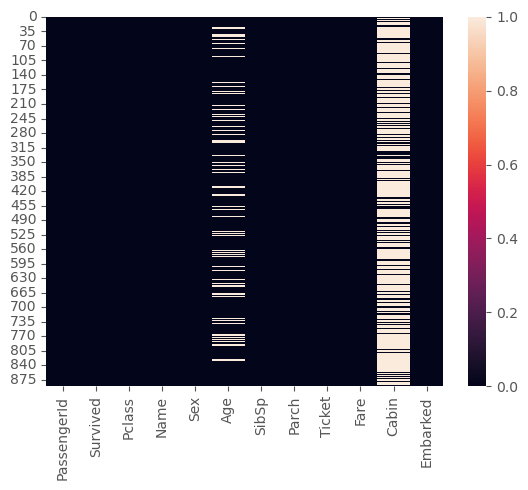

In [10]:
sns.heatmap(df.isna())

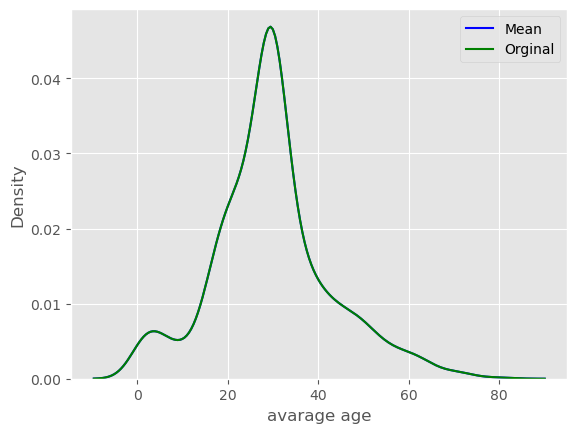

In [11]:
df["Age"].fillna(df["Age"].mean(),inplace=True)  
df["avarage age"]=df["Age"].fillna(df["Age"].mean())
df.head()

sns.kdeplot(df["avarage age"], color="blue", label="Mean")
sns.kdeplot(df["Age"], color="green", label="Orginal")
plt.legend()

<Axes: >

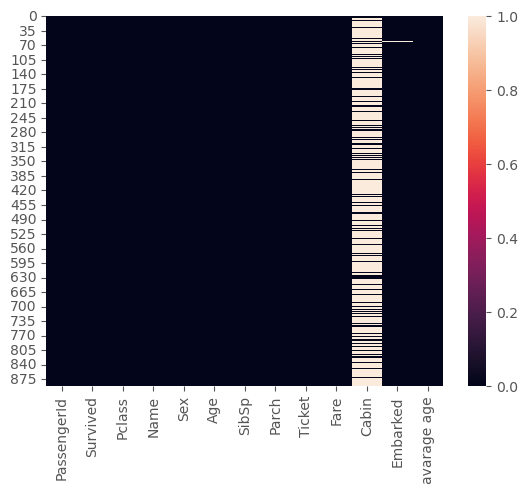

In [12]:
sns.heatmap(df.isna())

In [13]:
df.drop(["avarage age","Cabin",'PassengerId','Name','Ticket',"Fare"],axis=1,inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [14]:
pd.DataFrame({
    " ": ["not survived", "survived"],
    "value count": df["Survived"].value_counts(),
    "percentage": [(df["Survived"] == 0).sum() * 100 / len(df), (df["Survived"] == 1).sum() * 100 / len(df)]
}).set_index(" ").head()


,value count,percentage
,,
not survived,549,61.616162
survived,342,38.383838


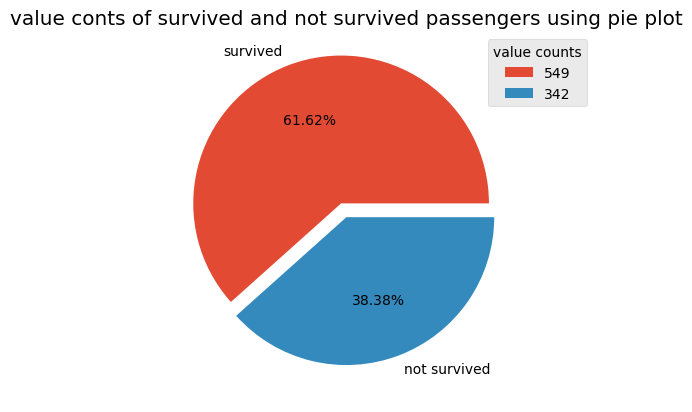

In [15]:
value=[549,342]
plt.axis("equal")
plt.pie(value,labels=["survived","not survived"],explode=[0.1,0],autopct="%1.2f%%")
plt.title("value conts of survived and not survived passengers using pie plot")
plt.legend(title="value counts", labels=[549,342])
plt.show()

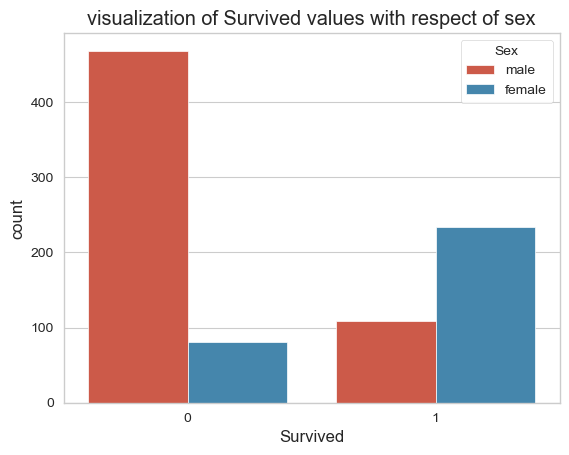

In [16]:
sns.set_style("whitegrid")
sns.countplot(x="Survived",hue="Sex",data=df)
plt.title("visualization of Survived values with respect of sex")
plt.show()

AttributeError: 'numpy.int64' object has no attribute 'startswith'

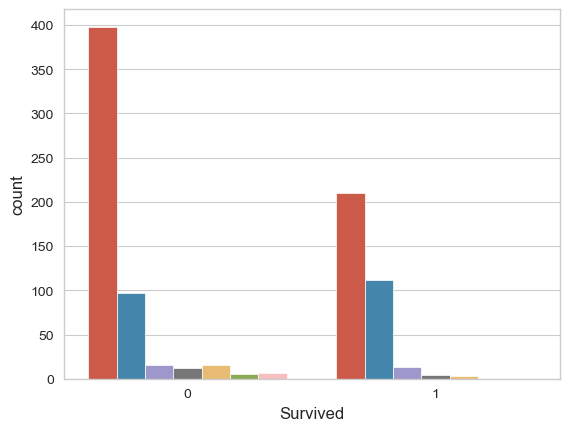

In [17]:
sns.set_style("whitegrid")
sns.countplot(x="Survived",hue="SibSp",data=df)
plt.title("visualization of Survived values with respect of SibSp")
plt.show()

AttributeError: 'numpy.int64' object has no attribute 'startswith'

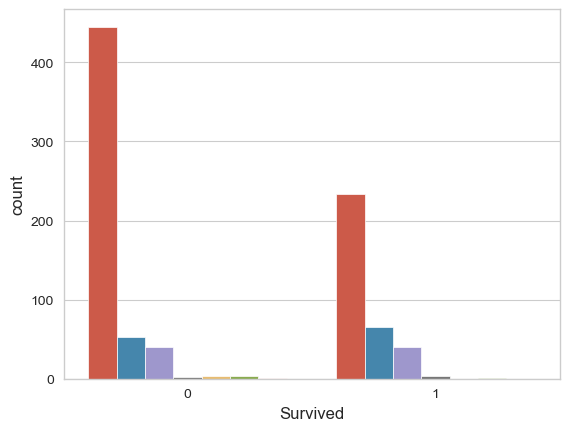

In [25]:
sns.set_style("whitegrid")
sns.countplot(x="Survived",hue="Parch",data=df)
plt.title("visualization of Survived values with respect of nomber of parents and childrens")
plt.show()

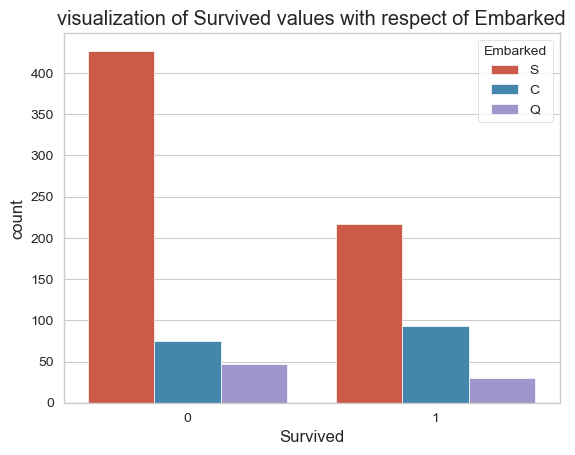

In [26]:
sns.set_style("whitegrid")
sns.countplot(x="Survived",hue="Embarked",data=df)
plt.title("visualization of Survived values with respect of Embarked")
plt.show()

In [28]:
pd.crosstab(df["Survived"],df["Pclass"], margins=True,margins_name="total" )

Pclass,1,2,3,total
Survived,,,,
0,80,97,372,549
1,136,87,119,342
total,216,184,491,891


In [29]:
pd.crosstab(df["Survived"],df["Sex"], margins=True,margins_name="total" )

Sex,female,male,total
Survived,,,
0,81,468,549
1,233,109,342
total,314,577,891


In [30]:
pd.crosstab(df["Survived"],df["SibSp"], margins=True,margins_name="total" )

SibSp,0,1,2,3,4,5,8,total
Survived,,,,,,,,
0,398,97,15,12,15,5,7,549
1,210,112,13,4,3,0,0,342
total,608,209,28,16,18,5,7,891


In [31]:
pivot=df.pivot_table("Survived", index=["Embarked","Pclass","SibSp"],columns="Sex")
pivot

Sex                      female      male
Embarked Pclass SibSp                    
C        1      0      0.956522  0.343750
                1      1.000000  0.600000
                2      1.000000       NaN
         2      0      1.000000  0.400000
                1      1.000000  0.000000
         3      0      0.692308  0.176471
                1      0.428571  0.500000
                2      1.000000  0.000000
Q        1      1      1.000000       NaN
                2           NaN  0.000000
         2      0      1.000000  0.000000
         3      0      0.703704  0.068966
                1      0.800000  0.000000
                2      1.000000  1.000000
                4           NaN  0.000000
S        1      0      1.000000  0.321429
                1      0.904762  0.428571
                2      1.000000  1.000000
                3      1.000000  0.000000
         2      0      0.925000  0.100000
                1      0.869565  0.318182
                2      1.000000  0.200000
                3      1.000000       NaN
         3      0      0.487805  0.130435
                1      0.384615  0.187500
                2      0.000000  0.000000
                3      0.125000  0.000000
                4      0.333333  0.125000
                5      0.000000  0.000000
                8      0.000000  0.000000

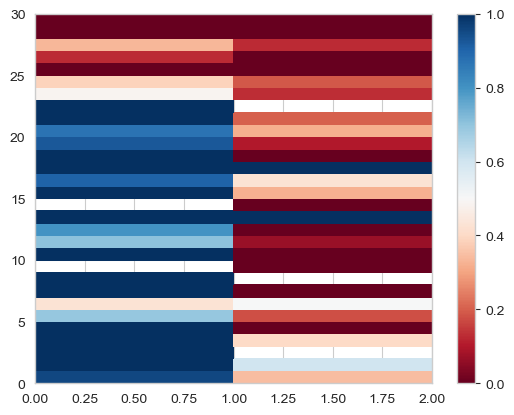

In [32]:
plt.pcolor(pivot,cmap="RdBu")
plt.colorbar()
plt.show()

<Axes: xlabel='Embarked,Pclass,SibSp'>

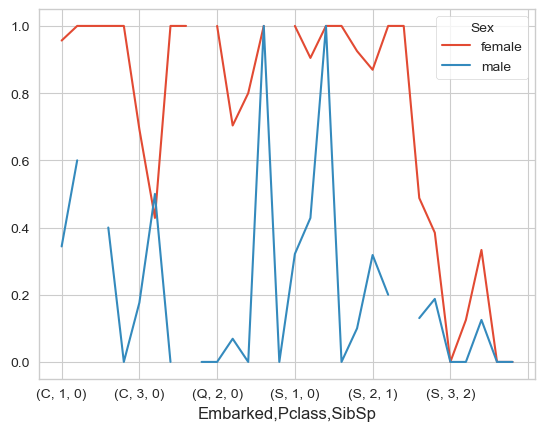

In [33]:
pivot.plot()

In [34]:
gender=pd.get_dummies(df['Sex'],drop_first=True)

In [35]:
df["gender"]=gender

In [36]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,gender
0,0,3,male,22.0,1,0,S,True
1,1,1,female,38.0,1,0,C,False
2,1,3,female,26.0,0,0,S,False
3,1,1,female,35.0,1,0,S,False
4,0,3,male,35.0,0,0,S,True


In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [38]:
lbm=LabelEncoder()
df["Embarked"]=lbm.fit_transform(df["Embarked"].values)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,gender
0,0,3,male,22.0,1,0,2,True
1,1,1,female,38.0,1,0,0,False
2,1,3,female,26.0,0,0,2,False
3,1,1,female,35.0,1,0,2,False
4,0,3,male,35.0,0,0,2,True


In [39]:
x=df[["gender","Pclass","Age","SibSp","Parch","Embarked"]]
y=df["Survived"]

In [40]:
x

,gender,Pclass,Age,SibSp,Parch,Embarked
0,True,3,22.000000,1,0,2
1,False,1,38.000000,1,0,0
2,False,3,26.000000,0,0,2
3,False,1,35.000000,1,0,2
4,True,3,35.000000,0,0,2
...,...,...,...,...,...,...
886,True,2,27.000000,0,0,2
887,False,1,19.000000,0,0,2
888,False,3,29.699118,1,2,2
889,True,1,26.000000,0,0,0


In [41]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [62]:
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)
logmodel_score=round(logmodel.score(x_train,y_train)*100.2)
print("Accuracy for the logistic model is" , logmodel_score)

decision_tree=DecisionTreeClassifier()
decision_tree.fit(x_train,y_train)
decision_tree_score=round(decision_tree.score(x_train,y_train)*100.2)
print("Accuracy for the decisiontree model is" , decision_tree_score)


randomforest=RandomForestClassifier(n_estimators=100,criterion="entropy",random_state=0)
randomforest.fit(x_train,y_train)
randomforest_score=round(randomforest.score(x_train,y_train)*100.2)
print("Accuracy for the randomforest model is" , randomforest_score)




svc=SVC(kernel="rbf",random_state=0)
svc.fit(x_train,y_train)
svc_score=round(svc.score(x_train,y_train)*100.2)
print("Accuracy for the svc model is" , svc_score)




gaussiannb=GaussianNB()
gaussiannb.fit(x_train,y_train)
gaussiannb_score=round(gaussiannb.score(x_train,y_train)*100.2)
print("Accuracy for the gaussiannb model is" , gaussiannb_score)



Kneighbors=KNeighborsClassifier(n_neighbors=2,metric="euclidean", p=2)
Kneighbors.fit(x_train,y_train)
Kneighbors_score=round(Kneighbors.score(x_train,y_train)*100.2)
print("Accuracy for the Kneighbors model is" , Kneighbors_score)



Accuracy for the logistic model is 80
Accuracy for the decisiontree model is 95
Accuracy for the randomforest model is 95
Accuracy for the svc model is 65
Accuracy for the gaussiannb model is 79
Accuracy for the Kneighbors model is 81


In [64]:
bestone=pd.DataFrame({"Model" :["logistic","decisiontree","randomforest","svc","gaussiannb","knn"],
                      "Accuracy rate" :[logmodel_score,decision_tree_score,randomforest_score,svc_score,gaussiannb_score,Kneighbors_score]})
bestone.sort_values(by="Accuracy rate",ascending=False)

,Model,Accuracy rate
1,decisiontree,95
2,randomforest,95
5,knn,81
0,logistic,80
4,gaussiannb,79
3,svc,65


Text(0.5, 1.0, 'barplot using different models')

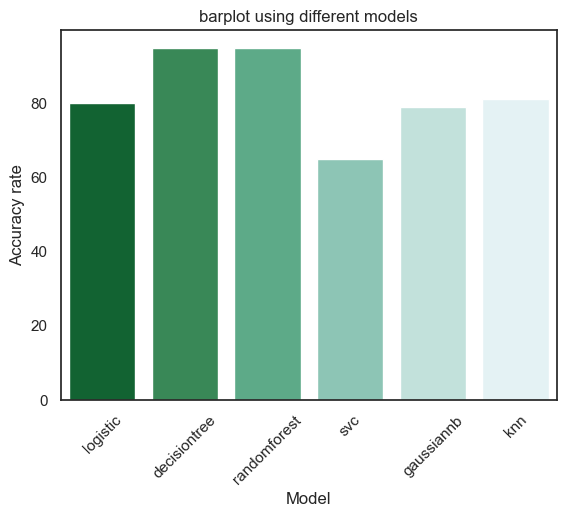

In [76]:
sns.set_theme(style="white")
sns.barplot(x="Model",y="Accuracy rate",data=bestone,palette="BuGn_r")
plt.xticks(rotation=45)
plt.title("barplot using different models")

In [78]:
predict=logmodel.predict(x_test)

In [77]:
from sklearn.metrics import confusion_matrix

In [79]:
pd.DataFrame(confusion_matrix(y_test,predict),columns=["predicted no","predicted yes"],index=["actual no","actual yes"])

,predicted no,predicted yes
actual no,153,22
actual yes,32,88


In [80]:
from sklearn.metrics import classification_report

In [81]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       175
           1       0.80      0.73      0.77       120

    accuracy                           0.82       295
   macro avg       0.81      0.80      0.81       295
weighted avg       0.82      0.82      0.82       295

